# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_ordenes = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_productos = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departamento = pd.read_csv('/datasets/departments.csv', sep=';')
df_orden_productos = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
df_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
df_departamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
df_orden_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Las ordenes solo tiene numeros enteros, lo que significa que los datos no son completamente divisibles, pero hay varios datos que necesitan ser cambiados a otro tipo de datos. Como days_since_prior_order de float a int si solo necesito el numero de dias.

En Productos, Aisles y Departamentos, tiene que cambiar los nombres de Object a Strings.

En Orden Productos, "Add to cart order" es float, pero si usa los ID de ordenes, necesitaria ser enteros

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Primero, la informacion de los datos deben ser "limpiados" por lo que la informacion debe ser:
    
    -ordenar la informacion actual de los dataframes.
    -eliminado si es completamente duplicado.
    -añadir datos default a valores nulos
    -arreglar los tipos de datos de todos los dataframes.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_ordenes.duplicated().sum())

15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Hay lineas duplicadas, sin embargo, la cantidad de filas hace dificil very que datos especificos tienen datos en comin, no obstante, estos son datos completamente iguales, por lo que todos aparecen mas de una vez.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
# Filtrar pedidos hechos el miércoles a las 2:00 a.m.
pedidos_miercoles_2am = df_ordenes[
    (df_ordenes['order_dow'] == 3) &
    (df_ordenes['order_hour_of_day'] == 2)
]

# Mostrar el resultado
print(pedidos_miercoles_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? Todos los resultados son del miercoles a las 2 AM, pero los dias desde la ultima orden cambia.

In [10]:
# Elimina los pedidos duplicados
df_ordenes = df_ordenes.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_ordenes.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_ordenes['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Descubri que hay datos publicados explicitamente, para obtener datos mas precisos, los repetidos fueron elimindados.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_productos.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_productos['product_id'].duplicated().sum())

0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(df_productos['product_name'].str.upper().duplicated().sum())

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print(len(df_productos[df_productos['product_name'].notna() & 
                       df_productos.duplicated(subset='product_name', keep=False)]))

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los datos nulos son tecnicamente datos duplicados, pero como las filas son diferentes, los duplicados son implicitos.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df_departamento.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departamento['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay ningun dato de departamento duplicado.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df_aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay Aisles duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df_orden_productos.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_orden_productos.head(10))

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
5   2456893       21616                4.0          1
6    644579       12341                5.0          1
7   2231852       44925               10.0          1
8   3185766       36259               14.0          1
9    420019       23315                4.0          1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Ordenes de productos no tiene datos repetidos, incluso cuando imprimo los datos, a la vista, aun no hay valores iguales explicitos o implicitos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_productos[df_productos['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

El articulo viene especificamente del aisle 100 y del departamento 21, Lo que es posible que el error es en el etiquetado del producto.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_productos['aisle_id'].nunique() == 1 and df_productos['aisle_id'].iloc[0] == 100)

False


Describe brevemente cuáles son tus hallazgos.

No, no todos los productos con nombre nulos son parte de Aisle 100, es posible que algunos son realmente datos erroneos, pero los datos en aisle 100 si son consistente, problema con etiquetado.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_productos['department_id'].nunique() == 1 and df_productos['department_id'].iloc[0] == 21)

False


Describe brevemente cuáles son tus hallazgos.

Igual que aisle 100, todos los productos nulos no son necesariamente del departamento 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Revisar información del pasillo con ID 100
print("Pasillo con ID 100:")
print(df_aisles[df_aisles['aisle_id'] == 100])

# Revisar información del departamento con ID 21
print("\nDepartamento con ID 21:")
print(df_departamento[df_departamento['department_id'] == 21])

Pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

El producto no existen en Aisle 100 y departamento 21, simplemente no tiene nombre o no existe, por lo que se necesitara nombrar el producto desde su raiz.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_productos['product_name'] = df_productos['product_name'].fillna('Unknown')
print(df_productos[df_productos['product_name'].isna()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Descubri que el producto vinculado del Aisle 100 y Departamento 21 no existia, o se perdio, por lo que ponerle el default de "unknown" permite que no se pierda tanta informacion que puede ser util.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(df_ordenes.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(len(df_ordenes[
    df_ordenes['days_since_prior_order'].isna() &
    (df_ordenes['order_number'] != 1)
]))

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Traducí lo que pidio el comentario, el primer pedido del cliente significa que el numero de orden no sea 1, y observa si todas los datos ausentes son en ordenes "dias desde ultima orden" por lo que es posible tener nulo.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(df_orden_productos.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Valor mínimo:", df_orden_productos['add_to_cart_order'].min())
print("Valor máximo:", df_orden_productos['add_to_cart_order'].max())

Valor mínimo: 1.0
Valor máximo: 64.0


Describe brevemente cuáles son tus hallazgos.

Los valores de "add to card order" es el unico que tiene valores nulos, pero aun tiene valores validos debido que tiene un valor minimo de 1 a 64. Aunque aun no se que significa, es señal que hay que corregir los nulos

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_cart_order_ids = df_orden_productos[df_orden_productos['add_to_cart_order'].isna()]['order_id']
print(missing_cart_order_ids)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

# Filtra los pedidos con valores ausentes en 'add_to_cart_order'
missing_cart_orders = df_orden_productos[df_orden_productos['add_to_cart_order'].isna()]

# Agrupa por 'order_id' y cuenta cuántos 'product_id' hay en cada pedido
product_counts = missing_cart_orders.groupby('order_id')['product_id'].count()

# Muestra el valor mínimo del conteo
min_count = product_counts.min()
print("Cantidad mínima de productos en pedidos con datos ausentes:", min_count)

# Verifica si todos tienen más de 64 productos
all_above_64 = (product_counts > 64).all()
print("¿Todos tienen más de 64 productos?:", all_above_64)

Cantidad mínima de productos en pedidos con datos ausentes: 1
¿Todos tienen más de 64 productos?: False


Describe brevemente cuáles son tus hallazgos.

La cantidad minima de productos de un pedido con datos ausentes es 1, pero tener mas de 64 productos no tiene ninguna relevancia con los datos ausentes.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_orden_productos['add_to_cart_order'] = df_orden_productos['add_to_cart_order'].fillna(999).astype(int)
print(df_orden_productos['add_to_cart_order'].isna().sum())  # Debería dar 0
print(df_orden_productos.dtypes)  # Verifica el tipo de dato

0
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos.

"add_to_cart_order" era el datos mas propenzo a tener valores nulos, aunque el motivo no es claro, ninguno de los datos ausentes tiene mas de 64 productos, o almenos no todos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Arreglar los datos ausentes y duplicados fue mas complicado por que la cantidad de informacion incremento, por lo que fue necesario contar los datos nulos y duplicados. Confirmar y verificar los datos especificos.

Con los datos duplicados y los ausentes modificados, esta listo a ser analizado.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print("order_hour_of_day - min:", df_ordenes['order_hour_of_day'].min(), 
      "| max:", df_ordenes['order_hour_of_day'].max())

order_hour_of_day - min: 0 | max: 23


In [36]:
print("order_dow - min:", df_ordenes['order_dow'].min(), 
      "| max:", df_ordenes['order_dow'].max())

order_dow - min: 0 | max: 6


Escribe aquí tus conclusiones.

Los datos son sensibles, y cumplen con los requisitos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

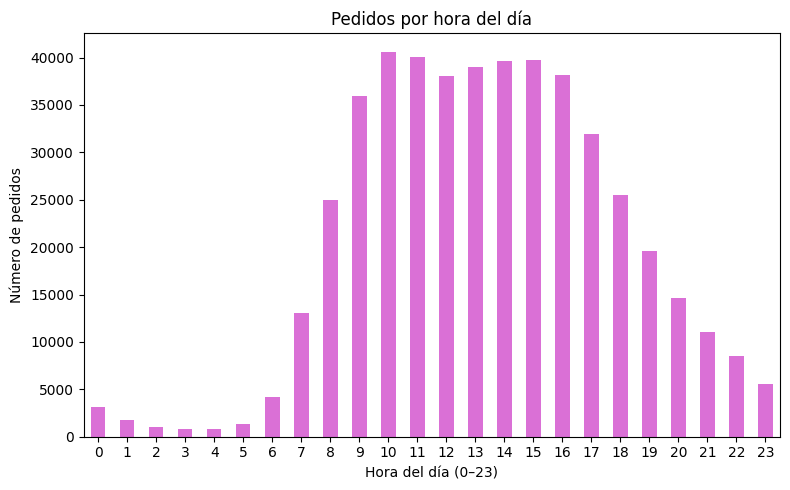

In [37]:
# Contar pedidos por hora del día
df_horas = df_ordenes['order_hour_of_day'].value_counts().sort_index().reset_index()
df_horas.columns = ['Hora del día', 'Número de pedidos']

# Graficar
df_horas.plot(
    kind='bar', x='Hora del día', y='Número de pedidos', title='Pedidos por hora del día', legend=False,
    xlabel='Hora del día (0–23)', ylabel='Número de pedidos', color='orchid', figsize=(8,5), rot=0
)

plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

La gente pide ordenes a partis de las 8, y se maximiza a las 10, y las ordenes bajan a partir de las 18

### [A3] ¿Qué día de la semana compran víveres las personas?

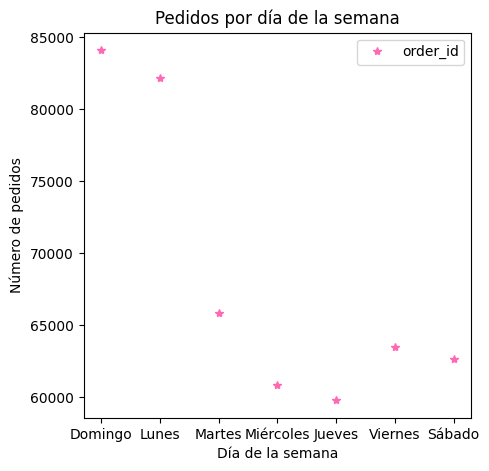

In [38]:
# Agrupamos por order_dow y contamos los pedidos
df_dow = df_ordenes.groupby('order_dow')['order_id'].count().reset_index()

# Mapeamos los números a los nombres de los días
dias_semana = {
    0: 'Domingo', 1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 5: 'Viernes', 6: 'Sábado'
}
df_dow['order_dow'] = df_dow['order_dow'].map(dias_semana)

# Graficamos
df_dow.plot(
    title='Pedidos por día de la semana',kind='line',style='*',color='hotpink',figsize=(5, 5),x='order_dow',y='order_id',
    xlabel='Día de la semana',ylabel='Número de pedidos'
)

plt.show()

Escribe aquí tus conclusiones

Hay muchos pedidos durante los domingos comparato con toda la semana, con el Jueves siendo el dia con menos ordenes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

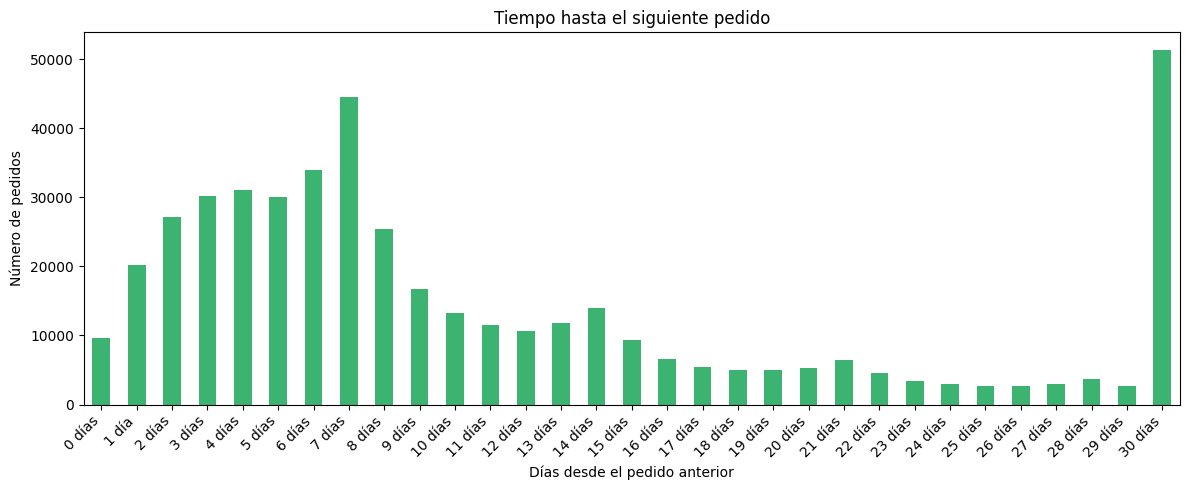

Dias mínimo: 0.0 Dias máximo: 30.0



In [79]:
# Primero, redondeamos a enteros por si hay decimales
dias = df_ordenes['days_since_prior_order'].dropna().astype(int)

# Conteo de frecuencia ordenado
frecuencia = dias.value_counts().sort_index()

# Etiquetas personalizadas para el eje X
etiquetas = [f'{d} día{"s" if d != 1 else ""}' for d in frecuencia.index]

# Crear el gráfico
frecuencia.plot(
    kind='bar', title='Tiempo hasta el siguiente pedido', xlabel='Días desde el pedido anterior', ylabel='Número de pedidos',
    color='mediumseagreen', figsize=(12,5)
)
plt.xticks(ticks=range(len(etiquetas)), labels=etiquetas, rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Dias mínimo:", df_ordenes['days_since_prior_order'].min(), "Dias máximo:", df_ordenes['days_since_prior_order'].max())

Escribe aquí tus conclusiones

Los clientes frecuentes suelen volver a pedir ordenes en la primera semana, con el fin de semana siendo comun, pero la gente suele pedir comida en grandes cantidades despues de un mes.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
# Filtrar por día de la semana
miercoles = df_ordenes[df_ordenes['order_dow'] == 3]
sabado = df_ordenes[df_ordenes['order_dow'] == 5]

In [41]:
# Contar pedidos por hora del día
miercoles_horas = miercoles['order_hour_of_day'].value_counts().sort_index()
sabado_horas = sabado['order_hour_of_day'].value_counts().sort_index()

In [42]:
# Crear DataFrame conjunto
df_horas = pd.DataFrame({
    'Miércoles': miercoles_horas, 'Sábado': sabado_horas
})

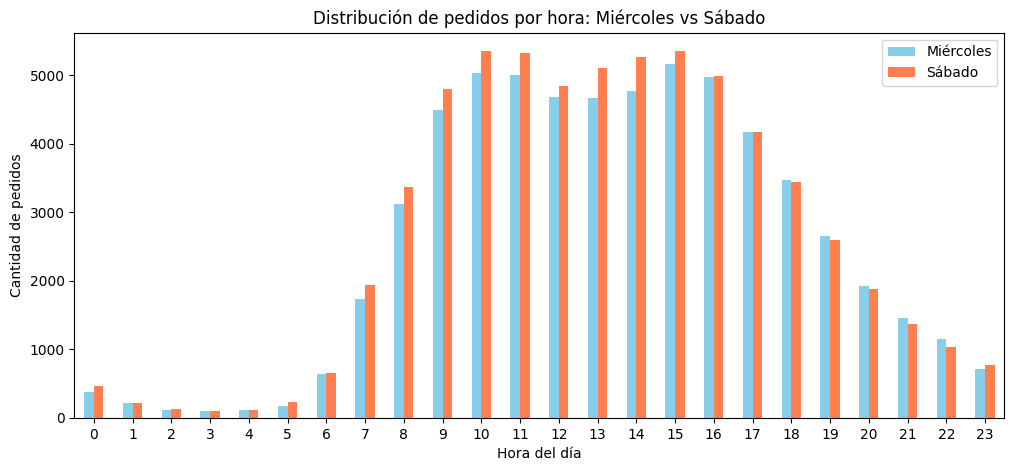

In [43]:
# Graficar con tu formato
df_horas.plot(kind='bar', title='Distribución de pedidos por hora: Miércoles vs Sábado', xlabel='Hora del día',
    ylabel='Cantidad de pedidos', color=['skyblue', 'coral'], figsize=(12,5), rot=0
)
plt.show()

Escribe aquí tus conclusiones

Observando la tabla, no parece que hay diferencias notables.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
pedidos_por_cliente = df_ordenes.groupby('user_id')['order_id'].count()

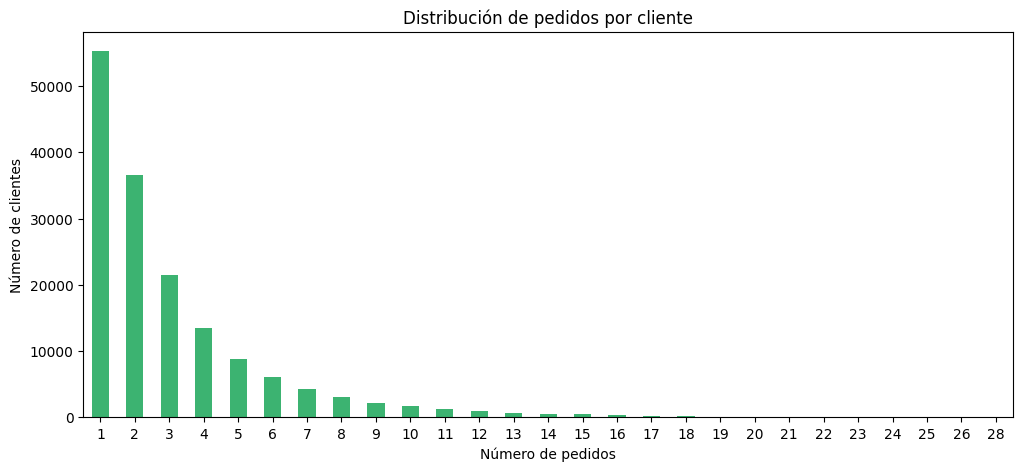

In [45]:
pedidos_por_cliente.value_counts().sort_index().plot(
    kind='bar',
    title='Distribución de pedidos por cliente',
    xlabel='Número de pedidos',
    ylabel='Número de clientes',
    color='mediumseagreen',
    figsize=(12,5),
    rot=0
)
plt.show()

Escribe aquí tus conclusiones

Los clientes suelen pedir solo una orden, pero pueden pedir hasta 7 ordenes, a lo mejor por actividades con amigos o familia, pero no piden mas de 10, o almenos no es comun.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
productos_mas_populares = df_orden_productos['product_id'].value_counts().head(20)

In [47]:
top_20 = productos_mas_populares.reset_index()
top_20.columns = ['product_id', 'count']

top_20 = top_20.merge(df_productos[['product_id', 'product_name']], on='product_id')

In [66]:

print(top_20[['product_id', 'product_name','count']])

    product_id              product_name  count
0        24852                    Banana  66050
1        13176    Bag of Organic Bananas  53297
2        21137      Organic Strawberries  37039
3        21903      Organic Baby Spinach  33971
4        47209      Organic Hass Avocado  29773
5        47766           Organic Avocado  24689
6        47626               Large Lemon  21495
7        16797              Strawberries  20018
8        26209                     Limes  19690
9        27845        Organic Whole Milk  19600
10       27966       Organic Raspberries  19197
11       22935      Organic Yellow Onion  15898
12       24964            Organic Garlic  15292
13       45007          Organic Zucchini  14584
14       39275       Organic Blueberries  13879
15       49683            Cucumber Kirby  13675
16       28204        Organic Fuji Apple  12544
17        5876             Organic Lemon  12232
18        8277  Apple Honeycrisp Organic  11993
19       40706    Organic Grape Tomatoes

Escribe aquí tus conclusiones

Los planatos son las ordenes mas populares, mientras que los tomates, manzanas y limones son menos pedidos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
productos_por_pedido = df_orden_productos.groupby('order_id')['product_id'].count()

In [50]:
print(productos_por_pedido.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


<AxesSubplot:title={'center':'Distribución de artículos por pedido'}, ylabel='Frequency'>

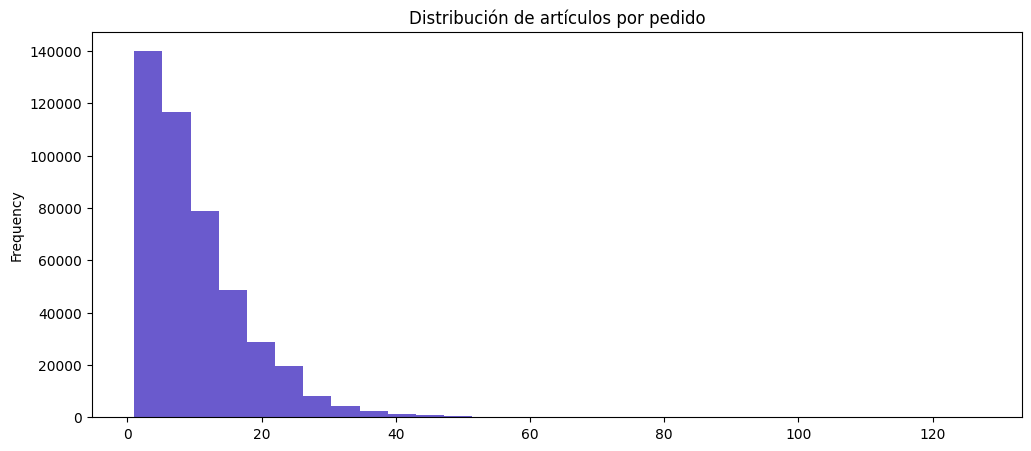

In [51]:
productos_por_pedido.plot(
    kind='hist',
    bins=30,
    title='Distribución de artículos por pedido',
    xlabel='Cantidad de artículos en el pedido',
    ylabel='Número de pedidos',
    color='slateblue',
    figsize=(12,5)
)

Escribe aquí tus conclusiones

Las personas suelen pedir entre 1 a 20 articulas en un pedido, estos son las distribuciones mas comunes de los pedidos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
reordenados = df_orden_productos[df_orden_productos['reordered'] == 1]

In [53]:
top_reordenados = reordenados['product_id'].value_counts().head(20)

In [54]:
top_reordenados = top_reordenados.reset_index()
top_reordenados.columns = ['product_id', 'reorder_count']
top_reordenados = top_reordenados.merge(df_productos[['product_id', 'product_name']], on='product_id')

In [55]:
print(top_reordenados[['product_id', 'product_name', 'reorder_count']])

    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277  Apple Honeycrisp Organic        

Escribe aquí tus conclusiones

Los planatos son los productos mas populares, 2 variaciones tomando las 2 mejores posiciones, pasando mas de 20000 dek top 3

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [76]:
pedido_stats = df_orden_productos.groupby('product_id')['reordered'].agg(
    veces_pedido='count',                      # Total de veces pedido (todas las veces)
    veces_reordenado='sum'                     # Total de veces reordenado (reordered = 1)
).reset_index()

In [77]:
pedido_stats = pedido_stats.merge(df_productos[['product_id', 'product_name']], on='product_id')

In [78]:
pedido_stats = pedido_stats.sort_values(by='veces_pedido', ascending=False)
pedido_stats.head(10)

,product_id,veces_pedido,veces_reordenado,product_name
22808,24852,66050,55763,Banana
12025,13176,53297,44450,Bag of Organic Bananas
19370,21137,37039,28639,Organic Strawberries
20077,21903,33971,26233,Organic Baby Spinach
43271,47209,29773,23629,Organic Hass Avocado
43788,47766,24689,18743,Organic Avocado
43663,47626,21495,15044,Large Lemon
15364,16797,20018,13945,Strawberries
24047,26209,19690,13327,Limes
25556,27845,19600,16251,Organic Whole Milk


Escribe aquí tus conclusiones

Los productos mas pedidos y reordenados normalmente son los productos mas populares, las veces pedidas no pueden ser menor a las veces reordenadas por que necesitas hacer la primera orden para hacer una reorden.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
# Unir pedidos y usuarios
df_orden_usuario = df_orden_productos.merge(df_ordenes[['order_id', 'user_id']], on='order_id')

# Agrupar por cliente y calcular stats
cliente_reordenes = df_orden_usuario.groupby('user_id')['reordered'].agg(
    total_productos='count',
    productos_reordenados='sum'
).reset_index()

In [60]:
# Calcular proporción
cliente_reordenes['proporcion_reorden'] = cliente_reordenes['productos_reordenados'] / cliente_reordenes['total_productos']
# Mostrar los primeros registros
print(cliente_reordenes.head(10))

   user_id  total_productos  productos_reordenados  proporcion_reorden
0        2               26                      1            0.038462
1        4                2                      0            0.000000
2        5               12                      8            0.666667
3        6                4                      0            0.000000
4        7               14                     13            0.928571
5       11               15                      3            0.200000
6       12               12                      3            0.250000
7       13               23                     13            0.565217
8       14               61                     22            0.360656
9       15               13                      7            0.538462


Escribe aquí tus conclusiones

No hay una corelacion entre los productos ordenados a las reordenes, pero si hay gente que reordena mas que los demas, por lo que la proporcion de reorden pueden estar mas cerca del 1 que los demas.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
# Filtrar solo los productos que fueron añadidos como el primero en el carrito
primeros_productos = df_orden_productos[df_orden_productos['add_to_cart_order'] == 1]

In [62]:
# Contar cuántas veces cada producto fue el primero en el carrito
conteo_primeros = primeros_productos['product_id'].value_counts().head(20)

In [63]:
# Juntarlo con el nombre del producto
top_primeros = conteo_primeros.reset_index()
top_primeros.columns = ['product_id', 'veces_primero']
top_primeros = top_primeros.merge(df_productos[['product_id', 'product_name']], on='product_id')

# Mostrar resultados
print(top_primeros)

    product_id  veces_primero                 product_name
0        24852          15562                       Banana
1        13176          11026       Bag of Organic Bananas
2        27845           4363           Organic Whole Milk
3        21137           3946         Organic Strawberries
4        47209           3390         Organic Hass Avocado
5        21903           3336         Organic Baby Spinach
6        47766           3044              Organic Avocado
7        19660           2336                 Spring Water
8        16797           2308                 Strawberries
9        27966           2024          Organic Raspberries
10       44632           1914   Sparkling Water Grapefruit
11       49235           1797          Organic Half & Half
12       47626           1737                  Large Lemon
13         196           1733                         Soda
14       38689           1397     Organic Reduced Fat Milk
15       26209           1370                        Lim

Escribe aquí tus conclusiones

Primero, los planatos parecen ser particularmente populares, per MUY populares, al parecer la gente le gusta.
Segundo, platanos, leche y frutas suelen ser los primeros productos que son añadidos al carro de las ordenes que cualquier otro consumible.

### Conclusion general del proyecto:

In [64]:
mensaje = 'En este proyecto, aprendi como a usar la metodologia del procesado y visualizacion de datos, empezando con analizar la informacion sin proceso, luego limpiar los datos ausentes y duplicados, y despues de eso, la informacion y los datos estan listos para ser usados de forma comoda, y con precision.'
print(mensaje)

En este proyecto, aprendi como a usar la metodologia del procesado y visualizacion de datos, empezando con analizar la informacion sin proceso, luego limpiar los datos ausentes y duplicados, y despues de eso, la informacion y los datos estan listos para ser usados de forma comoda, y con precision.
